In [1]:
import numpy as np
import pandas as pd
from graphmodels.graphmodel import GraphModel
from graphmodels.utils import parse_parameter_json

# Hard coded parameters
hard_coded_parameters = {
  
  'CL_stock': np.array([4323]),
  'IL_stock': np.array([189]),
  'FL_stock': np.array([2057.27]),

  'P': np.array([9729822]),
  'P_2017': np.array([9729822]),
  'FDKG2017_i': np.array([116.28, 46.66, 0.0, 38.96, 2.92, 0.28, 1.04, 11.05, 86.99, 47.26, 1.58, 2.76, 103.45, 4.19, 0.14, 49.82, 25.27, 0.3, 0.08, 16.23, 13.61, 190.82, 6.3, 0.01, 0.06]),
  'FDKC2017_i': np.array([882, 88, 0, 351, 27, 2, 13, 492, 69, 68, 28, 10, 200, 13, 1, 269, 104, 1, 0, 347, 53, 254, 13, 0, 1]),
  'FPi': np.array([14032, 403, 1076, 730, 51, 8, 2957, 852, 1458, 1131, 0, 31, 1408, 30, 2, 470, 493, 6, 37, 150, 139, 1924, 24, 0, 0]),
  'FEi': np.array([8279, 13, 118, 831, 26, 12, 1256, 660, 747, 491, 67, 3, 653, 16, 0, 200, 210, 10, 78, 28, 9, 619, 9, 0, 1]),
  'FIi': np.array([617, 130, 3, 568, 19, 8, 435, 119, 282, 300, 65, 8, 179, 27, 0, 237, 58, 3, 21, 52, 23, 704, 56, 0, 0]),
  'FLO2017i': np.array([119, 14, 54, 1, 3, 1, 14, 0, 58, 27, 0, 3, 1, 1, 0, 0, 18, 0, 0, 2, 7, 40, 0, 0, 0]),
  'SDi': np.array([389, 41, 0, 0, 6, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0]),
  'NFDi': np.array([105, 56, 0, 17, 0, 0, 3, 94, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0]),
  'PDi': np.array([1375, 0, 952, 22, 0, 0, 1990, 56, 23, 545, 1, 0, 0, 0, 0, 0, 16, 0, 0, 1, 0, 0, 0, 0, 152]),
  'RDi': np.array([-5, 0, -44, 61, 0, 0, -52, 0, -3, -67, -21, 0, -125, 0, 0, 0, -13, -4, -20, 0, -1, -49, 0, 0, -16]),
  'SVi': np.array([-904, -54, 0, -13, 3, 1, 67, 54, -34, -29, 3, 7, 51, 0, 0, 22, 74, 0, 0, 6, 0, 20, 0, 0, 0]),
  'FDi2017': np.array([4160, 9, 0, 1, 4, 0, 88, 0, 104, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 139, 10, 0, 0]),
  'AYi2017': np.array([254.6, 93.0, 2.4081, 11.853, 7097.1, 1.9136137551964694, 12.3, 265.6, 17.6, 1.4125]),
  'FCRi': np.array([25.0, 6.4, 3.3, 2.3, 0.7, 15.0, 0.0, 0.0, 0.0, 0.0]),
  'CYi': np.array([58355, 93057, 28497, 25375, 246182, 674754, 14246, 165618, 11977]),
  'TCL2017i': np.array([2402083, 155914, 1109160, 19894, 16364, 15941, 5813, 87104, 244]),
  'LU2017i': np.array([9303.0, 9126.0, 5564.0, 5303.0, 4499.0, 4323.0, 4077.0, 57.0, 189.0, 176.0, 804.0, 0.0, 0.0, 261.0, 2057.27, 1269.91, 787.36, 1504.73, 177.0, 0.0, 0.0]),
  'WC_N2O': np.array([1.5710338623658677]),
  'WC_CH4': np.array([1.3358479882760457]),
  'GWPN2O': np.array([310]),
  'GWPCH4': np.array([21]),
  'NFI': np.array([5.7]),
  'HR': np.array([76.2]),
  'E_Li2017': np.array([0.3491, 0.0, 0.0084, 0.3272, 0.0463]),
  'E_ASi2017': np.array([0.635, 0.5397, 0.4915, 0.1125, 0.004]),
  'E_Ti2017': np.array([0.4603, 0.3641, 0.1724, 0.0395, 0.0014]),
  'E_TCH4i2017': np.array([6.4324, 9.1313, 4.8415, 0.2273, 0.08589999999999999]),
  'TM_LP2017i': np.array([9159879.39999999, 0.0, 221687.49135, 14610855.1365, 2067588.76739999]),
  'TM_AS2017i': np.array([28358509.3849999, 24100038.8683966, 21947061.64365, 5024805.3135, 179790.327599999]),
  'TM_T2017i': np.array([38353922.5999999, 35046646.65, 21947061.64365, 5024805.3135, 179790.327599999]),
  'TMPi2017': np.array([47513802.0, 35046646.65, 22168749.1349999, 19635660.45, 2247379.0949999904]),
  'ANPi2017': np.array([110609, 5050984, 204768000, 11440000, 278000, 3822788, 18737, 1024, 89027, 3714000]),
  'TAHi2017_2': np.array([852000, 2907000, 40185000, 1222000, 57177]),
  'TAHi2017': np.array([244000, 608000, 1141000, 81000, 2907000, 4000, 177, 53000, 0, 40185000, 1083000, 0, 0]),
  'EECH4': np.array([59.42, 4.3605, 0.0, 9.533, 0.9957999999999999]),
  'FU2017': np.array([374728]),
  'MAS_2017': np.array([79610.2055]),
  'AD_2017': np.array([66103.807]),
  'CR_2017': np.array([301935.657]),
  'BF_2017': np.array([16793.78]),
  'TCD2017': np.array([4077]),
  'FE_2017': np.array([8.1765]),
  'OEi': np.array([1710.1189]),
  'CO2017i': np.array([22729]),
  'CNO2017i': np.array([301935.657]),
  'FWPPi': np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'FWCRi': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  'CSF': np.array([0]),
  'FB_conv': np.array([0.662]),
  'R_rate': np.array([25]),
  'W_rate': np.array([25]),
  'I_rate': np.array([50]),

 }

In [2]:
# def is_input_output_independant(model, input_, output_, X):
#     output_1 = model.run(X)[output_]
#     X_bis = X.copy()
#     X_bis[input_] = -1e4 * X_bis[input_]**2 + 10000
#     output_2 = model.run(X_bis)[output_]

#     if (output_2 - output_1).sum() == 0:
#         return True
#     else:
#         return False
    
# def test_all_inputs_in_model(model, output, X):
#     for var, value in X.items():
#         if is_input_output_independant(model, var, output, X):
#             print(var)    

# is_input_output_independant(model_BE2, 'AYi','BE2', parameters)

# test_all_inputs_in_model(model_BE2, 'BE2', parameters)

In [3]:
import pandas as pd
import numpy as np
import json

def pivot(df):
    return df.pivot(index=['Area', 'Year', 'Item'], columns='Element', values=['Value'])


data = pd.read_csv('models/Hermen/data/FBS.csv')

df = data[(data.Area=='Hungary') & (data.Year == 2017)].reset_index(drop=True)

FAO_to_GGI_code = {
    'Food supply (kcal/capita/day)': 'FDKCi',
    'Food supply quantity (kg/capita/yr)': 'FDKGi',
    'Production': 'FPi',
    'Seed': 'SDi',
    'Feed': 'FDi',
    'Processing': 'PDi',
    'Residuals': 'RDi',
    'Import Quantity': 'FIi',
    'Export Quantity': 'FEi',
    'Other uses (non-food)': 'NFDi',
    'Losses': 'FLOi',
    'Stock Variation': 'SVi',
    'Food': 'Food',
    'Domestic supply quantity': 'Domestic supply quantity',
    
}

df['GGI_code'] = df['Element'].apply(lambda x: FAO_to_GGI_code[x])

df.loc[df.GGI_code == 'FDKGi', 'Value'] = df.loc[df.GGI_code == 'FDKGi', 'Value'] / 365
df.loc[df.GGI_code == 'FDKGi', 'Unit']  = 'kg/capita/day'


def pivot(df):
    return df.pivot(index=['Item'], columns='GGI_code', values='Value')

df = pivot(df).fillna(0)

X = {}
for code in df.columns:
    X[code] = df[code]
    
X['P'] = 9729822
X['FWPPi'] = 0.5
X['FWCRi'] = 0
X['FDi_baseline'] = X['FDi']

from graphmodels.utils import parse_parameter_json

parameters = parse_parameter_json("models/Hermen/LandUse_parameters.json")
crop_group = ['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
              'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
              'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
              'Stimulants', 'Spices', 'Alcoholic Beverages']

X['FCRi'] = pd.Series([25, 6.4, 3.003, 2.3, 0.7, 15], index=['Bovine Meat', 'Pigmeat', 'Poultry Meat', 'Eggs', 'Milk - Excluding Butter', 'Meat, Other'])
X['LUi'] = parameters["LUi"]
X['CYi'] = parameters["CYi"]
X['TCLD_baseline'] = hard_coded_parameters['TCL2017i'].sum()
X['FMi'] = parameters['FDi'].loc[crop_group] / parameters['FDi'].sum()
X['TCLD_baseline'] = hard_coded_parameters['TCL2017i'].sum()
X['CL_t_minus_1'] = hard_coded_parameters['CL_stock'][0]
X['IL_t_minus_1'] = hard_coded_parameters['IL_stock'][0]
X['FL_t_minus_1'] = hard_coded_parameters['FL_stock'][0]
X['TLA'] = parameters['LUi'].loc['Land area']
X['FMi'] = parameters['FDi'].loc[crop_group] / parameters['FDi'].sum()
X['CD_corr'] = 1.36
X['CRfd'] = 0.7727026872586533
X['R_rate'] = 0.25

In [4]:
from models.Hermen.model_BE2 import model_BE2
res = model_BE2.run(X)#['BE2']

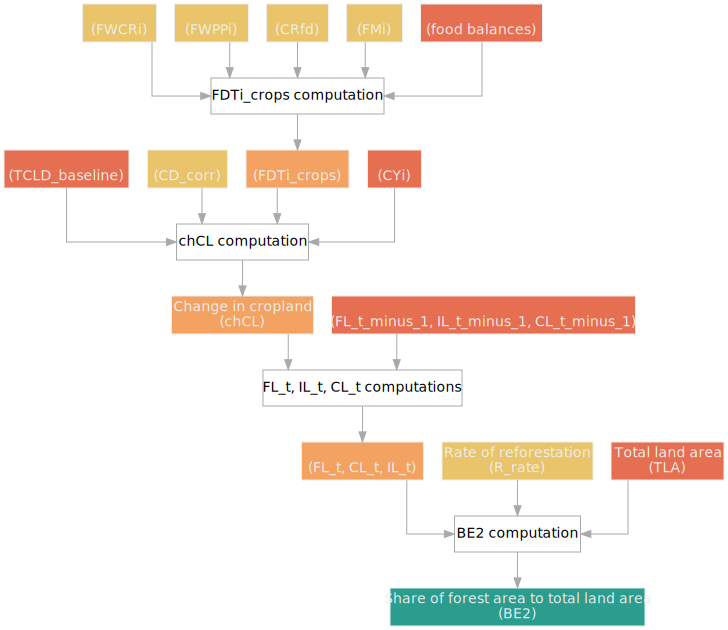

In [5]:
model_BE2.draw()

In [6]:
res['chCL']

34.16745549000694

In [143]:
from models.Hermen.model_BE2 import model_full_FDTi, FDi_crops_Model
ani_FDTI = model_full_FDTi.run(X)['FDTi'].loc[animal_group]

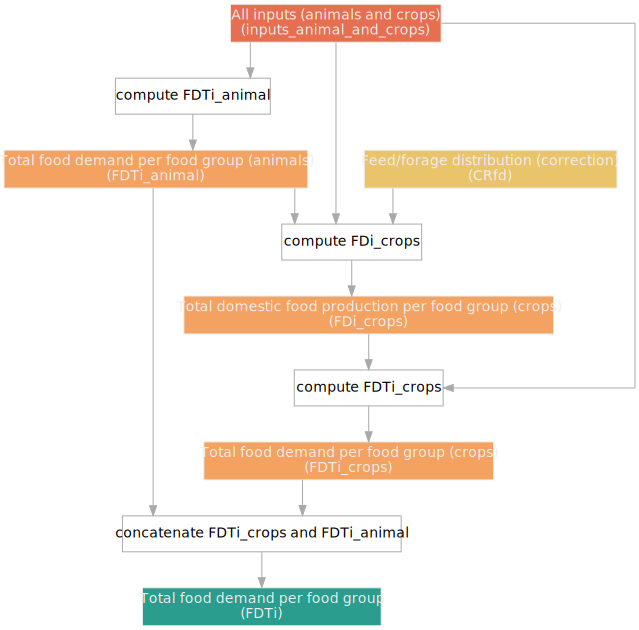

In [153]:
model_full_FDTi.draw()

In [144]:
X_bis= X.copy()
X['FDTi_animal'] = ani_FDTI
FDi_crops_Model.run(X)['FMi']#.loc[crop_group]

Cereals - Excluding Beer    0.920761
Starchy Roots               0.001992
Sugar Crops                 0.000000
Sugar & Sweeteners          0.000221
Pulses                      0.000885
Treenuts                    0.000000
Oilcrops                    0.019478
Vegetable Oils              0.000000
Vegetables                  0.023019
Fruits - Excluding Wine     0.000443
Stimulants                  0.000000
Spices                      0.000000
Alcoholic Beverages         0.000000
dtype: float64

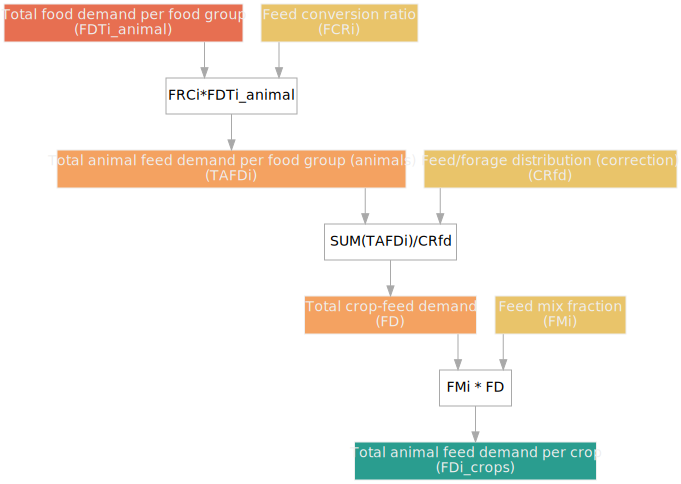

In [126]:
FDi_crops_Model.draw()

In [101]:
res['chCL']

34.16745549000694

In [102]:
res['BE2']

22.547195719496766

In [103]:
from models.Hermen.model_BE2 import model_full_FDTi

CD_corr_nodes = [
    {'type': 'input',
     'unit': '1000 tons',
     'id': 'food_balance',
     'name': 'Food balance',
     },
    {'type': 'variable',
     'unit': '1000 tons',
     'id': 'FDTi',
     'name': 'Total food demand per food group',
     'in': ['food_balance'],
     'computation':{'name': 'FDTi computation', 'formula': lambda X: model_full_FDTi.run(X)['FDTi']}
     },
    {'type': 'input',
     'unit': 'hg/ha',
     'id': 'CYi',
     'name': 'Crop yields per crop type'},
    {'type': 'variable',
     'unit': '',
     'id': 'TCLD',
     'name': 'Total crop land demand',
     'in': ['FDTi', 'CYi'],
     'computation':{'name': 'sum(FDTi * CYi)', 'formula': lambda X: 1e4 * (X['FDTi'] / X['CYi']).sum()}
    },
    {'type': 'input',
     'unit': '1000 ha',
     'id': 'LUi_baseline',
     'name': 'Land use per group'
    },
    {'type': 'variable',
     'unit': 'ha',
     'id': 'TCLD_baseline',
     'name': 'Total crop land demand (baseline)',
     'in': ['LUi_baseline'],
     'computation': {'name': 'LU_Cropland - LU_Land_under_permanent_crops',
                     'formula': lambda X: X['LUi'].loc['Cropland'] - X['LUi'].loc['Land under permanent crops']}
    },
    {'type': 'output',
     'unit': '',
     'id': 'CD_corr',
     'name': 'Correction parameter crop demand',
     'in': ['TCLD', 'TCLD_baseline'],
     'computation': {'name': 'TCLD_baseline / TCLD',
                     'formula': lambda X: X['TCLD_baseline'] / X['TCLD']}
    },
]

CD_corr_model = GraphModel(CD_corr_nodes)

In [104]:
CD_corr_model.run(X)['FDTi']

Item
Bovine Meat                    29.833869
Pigmeat                       469.758726
Poultry Meat                  470.080847
Eggs                          137.592567
Milk - Excluding Butter      1932.624832
Meat, Other                     6.486320
Cereals - Excluding Beer    22776.506514
Starchy Roots                 399.653909
Sugar Crops                          NaN
Sugar & Sweeteners            746.541840
Pulses                         51.350696
Treenuts                        5.507929
Oilcrops                     3258.110987
Vegetable Oils                886.775421
Vegetables                   1625.560224
Fruits - Excluding Wine      1216.576012
Stimulants                      0.000000
Spices                         26.069859
Alcoholic Beverages          1534.395027
dtype: float64

In [105]:
from models.Hermen.model_BE2 import model_full_FDTi
model_full_FDTi.run(X)['FDTi_crops']

Item
Cereals - Excluding Beer    22776.506514
Starchy Roots                 399.653909
Sugar Crops                          NaN
Sugar & Sweeteners            746.541840
Pulses                         51.350696
Treenuts                        5.507929
Oilcrops                     3258.110987
Vegetable Oils                886.775421
Vegetables                   1625.560224
Fruits - Excluding Wine      1216.576012
Stimulants                      0.000000
Spices                         26.069859
Alcoholic Beverages          1534.395027
dtype: float64

In [106]:
model_full_FDTi.run(X)['CRfd']

0.7727026872586533

In [51]:
from models.Hermen.model_BE2 import FDi_crops_Model

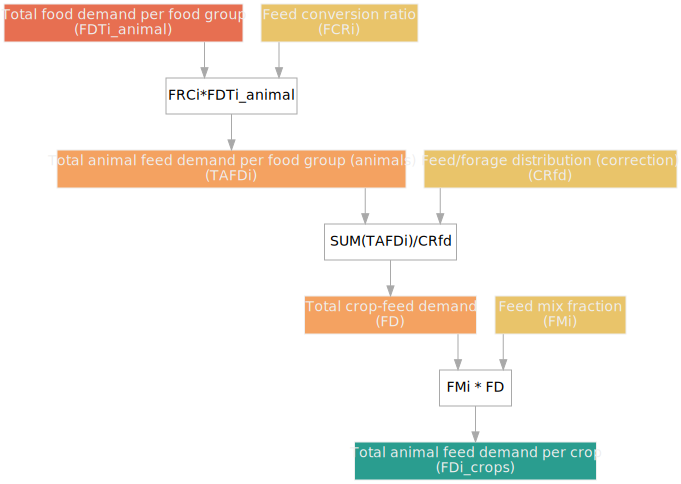

In [52]:
FDi_crops_Model.draw()

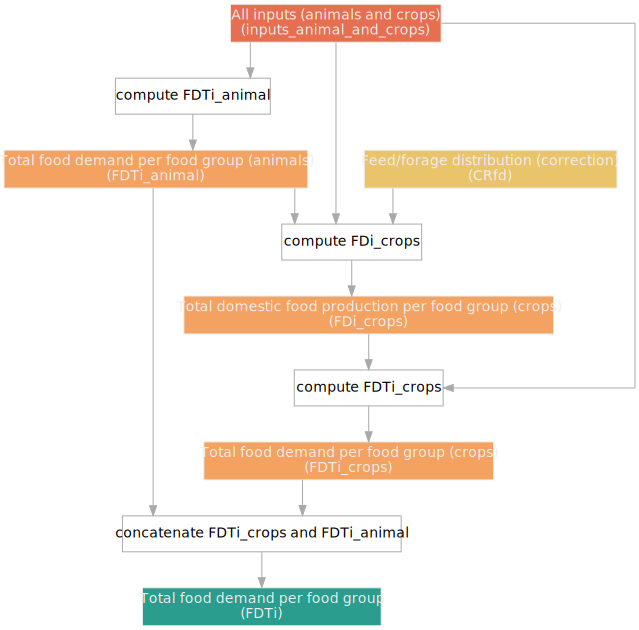

In [53]:
model_full_FDTi.draw()

In [54]:
CD_corr_model.run(X)['CD_corr']

0.8132613748843165

In [55]:
CRfd_nodes = [
    {'type': 'output',
     'unit': '',
     'id': 'CRfd',
     'name': 'Feed/forage distribution (correction)',
     'in': ['TAFDi', 'FDi'],
     'computation': {'name': 'SUM(TAFDi) / sum(FDi)',
                     'formula': lambda X: X['TAFDi'].sum() / X['FDi'].sum()}
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FDi',
     'name': 'Total domestic food production per food group',
     },
    # This computation uses the 2017 'FPi' value to calculate the 'TAFDi2017_cal' instead of the whole food demand computation for 2017.
    {'type': 'variable',
     'unit': 'kg',
     'id': 'TAFDi',
     'name': 'Total animal feed demand per food group (animals)',
     'in': ['FCRi', 'FPi_animal'],
     'computation': {'name': 'FRCi*FPi',
                     'formula': lambda X: X['FCRi'] * X['FPi_animal']}
     },
    {'type': 'parameter',
     'unit': 'kg DM feed/ kg EW',
     'id': 'FCRi',
     'name': 'Feed conversion ratio',
     },
    {'type': 'input',
     'unit': '1000 t',
     'id': 'FPi_animal',
     'name': 'Food production per food group',
     },
]


CRfd_model = GraphModel(CRfd_nodes)

In [56]:
animal_group = ['Bovine Meat', 'Pigmeat', 'Poultry Meat', 'Eggs', 'Milk - Excluding Butter', 'Meat, Other']

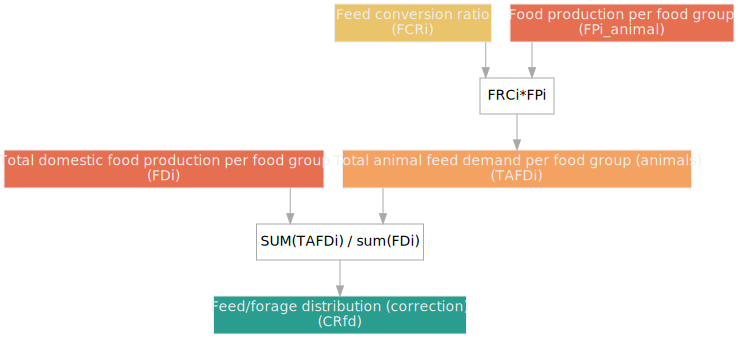

In [57]:
X = X.copy()
X['FPi_animal'] = X['FPi'].loc[animal_group]
CRfd_model.draw()

In [58]:
CRfd_model.run(X)['CRfd']

0.7727026872586533

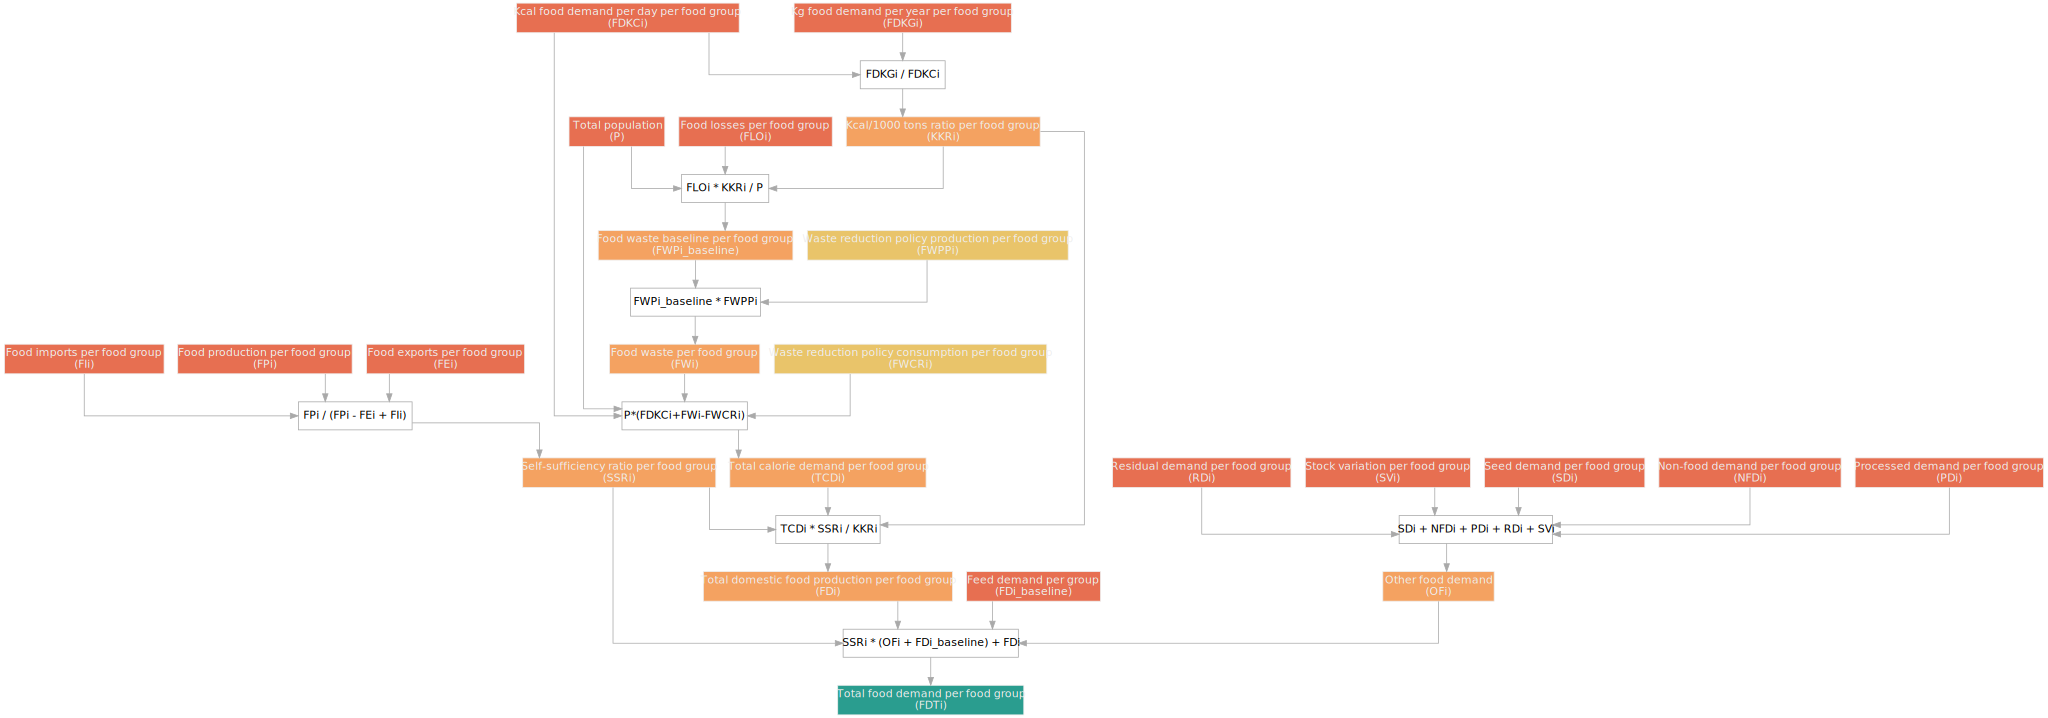

In [135]:
from models.Hermen.model_BE2 import FDTi_model
FDTi_model.draw()